# Final Assignment 

##### The main dataset has been pulled from the World Health Organization. http://www.who.int/en/ Our team has decided to focus on unnatural deaths. We also pulled the population information by country by year from wikipedia.

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import matplotlib.patches as mpatches

pd.options.mode.chained_assignment = None
import datetime


##### When Importing the data we noticed that many of the countries had incomplete data after 2010 so we've decided to remove anything after 2011. This still gives us data from 1985 to 2010 for us to play with

In [147]:
data = pd.read_excel('DataFileAssignmentUpdated.xls')
data = data[(data.Year < '2011-12-31')]
data = data[(data.Country != "UNITED ARAB EMIRATES")]
data = data[(data.Country != "JORDAN")]
data = data[(data.Country != "EGYPT")]
data.index=data['Year']
data.drop('Year', axis=1, inplace=True)
data.head(2)

,Country,TotalPop,PopMale,PopFemale,TransportAccAll,TransportAccMale,TransportAccFemale,FallsAll,FallsMale,FallsFemale,...,PoisonFemale,SuicideAll,SuicideMale,SuicideFemale,AssaultAll,AssaultMale,AssaultFemale,OtherAll,OtherMale,OtherFemale
Year,,,,,,,,,,,,,,,,,,,,,
1985-12-31,ALBANIA,2967000.0,1631850.0,1335150.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-12-31,ALBANIA,3029800.0,1666390.0,1363410.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [148]:
data.fillna(method='ffill', inplace=True)
data.fillna(method='bfill', inplace=True)


In [149]:
data['Accidental'] = data['FallsAll'] +  data['FireAll'] +  data['PoisonAll']
data['Intentional']= data['AssaultAll'] + data['SuicideAll']
data['DeathAll'] = data['Accidental'] + data['Intentional']
data['AccidentalMale'] = data['FallsMale'] +  data['FireMale'] +  data['PoisonMale']
data['IntentionalMale']= data['AssaultMale'] + data['SuicideMale']
data['DeathMale'] = data['AccidentalMale'] + data['IntentionalMale']
data['AccidentalFemale'] = data['FallsFemale'] +  data['FireFemale'] +  data['PoisonFemale']
data['IntentionalFemale']= data['AssaultFemale'] + data['SuicideFemale']
data['DeathFemale'] = data['AccidentalFemale'] + data['IntentionalFemale']
data.head(2)

,Country,TotalPop,PopMale,PopFemale,TransportAccAll,TransportAccMale,TransportAccFemale,FallsAll,FallsMale,FallsFemale,...,OtherFemale,Accidental,Intentional,DeathAll,AccidentalMale,IntentionalMale,DeathMale,AccidentalFemale,IntentionalFemale,DeathFemale
Year,,,,,,,,,,,,,,,,,,,,,
1985-12-31,ALBANIA,2967000.0,1631850.0,1335150.0,305.0,236.0,69.0,31.0,26.0,5.0,...,36.0,45.0,117.0,162.0,33.0,82.0,115.0,12.0,35.0,47.0
1986-12-31,ALBANIA,3029800.0,1666390.0,1363410.0,305.0,236.0,69.0,31.0,26.0,5.0,...,36.0,45.0,117.0,162.0,33.0,82.0,115.0,12.0,35.0,47.0


# Trending by Type of Fatality
##### Here a dataframe ontaining the international trending by types of deaths, all country data was summarized out.

In [150]:
International = pd.DataFrame(columns=[])
International['PopMale'] = data.groupby(['Year'])['PopMale'].transform('max')
International['PopFemale'] = data.groupby(['Year'])['PopFemale'].transform('max')
International['TotalPop'] = data.groupby(['Year'])['TotalPop'].transform('max')
International['TransportAccMale'] = data.groupby(['Year'])['TransportAccMale'].transform('sum')
International['TransportAccFemale'] = data.groupby(['Year'])['TransportAccFemale'].transform('sum')
International['TransportAccAll'] = data.groupby(['Year'])['TransportAccAll'].transform('sum')
International['FallsMale'] = data.groupby(['Year'])['FallsMale'].transform('sum')
International['FallsFemale'] = data.groupby(['Year'])['FallsFemale'].transform('sum')
International['FallsAll'] = data.groupby(['Year'])['FallsAll'].transform('sum')
International['AssaultMale'] = data.groupby(['Year'])['AssaultMale'].transform('sum')
International['AssaultFemale'] = data.groupby(['Year'])['AssaultFemale'].transform('sum')
International['AssaultAll'] = data.groupby(['Year'])['AssaultAll'].transform('sum')
International['SuicideMale'] = data.groupby(['Year'])['SuicideMale'].transform('sum')
International['SuicideFemale'] = data.groupby(['Year'])['SuicideFemale'].transform('sum')
International['SuicideAll'] = data.groupby(['Year'])['SuicideAll'].transform('sum')
International['OtherMale'] = data.groupby(['Year'])['OtherMale'].transform('sum')
International['OtherFemale'] = data.groupby(['Year'])['OtherFemale'].transform('sum')
International['OtherAll'] = data.groupby(['Year'])['OtherAll'].transform('sum')
International['FireMale'] = data.groupby(['Year'])['FireMale'].transform('sum')
International['FireFemale'] = data.groupby(['Year'])['FireFemale'].transform('sum')
International['FireAll'] = data.groupby(['Year'])['FireAll'].transform('sum')
International['DeathAll'] = data.groupby(['Year'])['DeathAll'].transform('sum')
International['DeathMale'] = data.groupby(['Year'])['DeathMale'].transform('sum')
International['DeathFemale'] = data.groupby(['Year'])['DeathFemale'].transform('sum')
International.head(2)

,PopMale,PopFemale,TotalPop,TransportAccMale,TransportAccFemale,TransportAccAll,FallsMale,FallsFemale,FallsAll,AssaultMale,...,SuicideAll,OtherMale,OtherFemale,OtherAll,FireMale,FireFemale,FireAll,DeathAll,DeathMale,DeathFemale
Year,,,,,,,,,,,,,,,,,,,,,
1985-12-31,126363300.0,114328700.0,240692000.0,247234.0,79652.0,326886.0,63569.0,55655.0,119224.0,146182.0,...,265822.0,278501.0,99209.0,377710.0,22694.0,13524.0,36218.0,715075.0,521290.0,193785.0
1986-12-31,127639680.0,115483520.0,243123200.0,216869.0,70363.0,287232.0,53086.0,53273.0,106359.0,111502.0,...,216587.0,219820.0,75733.0,295553.0,14724.0,10001.0,24725.0,546429.0,385568.0,160861.0


##### Graphing the International Trending by the different types of Deaths as well as the population trending overall

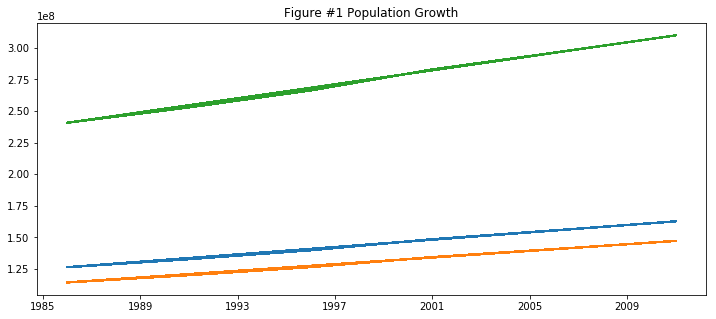

In [151]:
plt.figure(figsize=(12,5))
plt.subplot(111)
plt.title("Figure #1 Population Growth")
plt.plot(International['PopMale'])
plt.plot(International['PopFemale'])
plt.plot(International['TotalPop'])
plt.show()

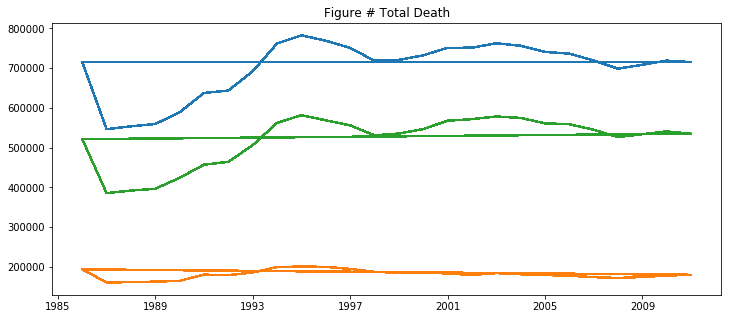

In [152]:
plt.figure(figsize=(12,5))
plt.subplot(111)
plt.title("Figure # Total Death")
plt.plot(International['DeathAll'])
plt.plot(International['DeathFemale'])
plt.plot(International['DeathMale'])
plt.show()

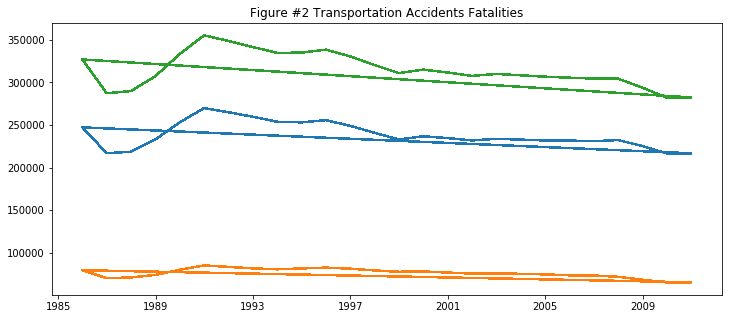

In [153]:
plt.figure(figsize=(12,5))
plt.subplot(111)
plt.title("Figure #2 Transportation Accidents Fatalities")
plt.plot(International['TransportAccMale'])
plt.plot(International['TransportAccFemale'])
plt.plot(International['TransportAccAll'])
plt.show()

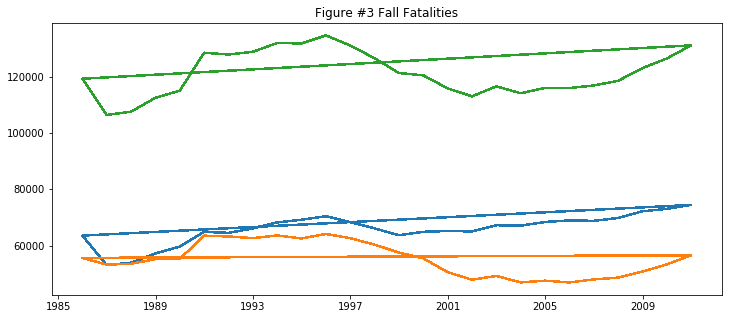

In [154]:
plt.figure(figsize=(12,5))
plt.subplot(111)
plt.title("Figure #3 Fall Fatalities")
plt.plot(International['FallsMale'])
plt.plot(International['FallsFemale'])
plt.plot(International['FallsAll'])
plt.show()

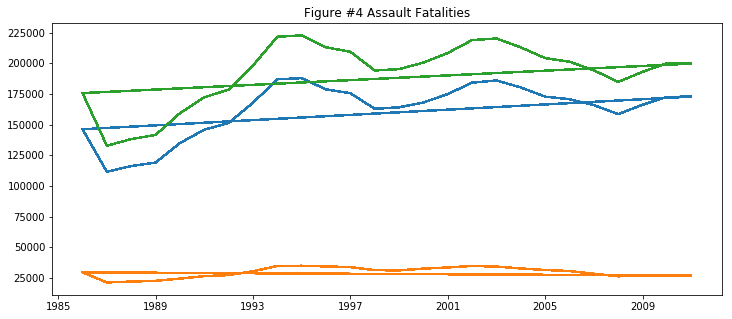

In [155]:
plt.figure(figsize=(12,5))
plt.subplot(111)
plt.title("Figure #4 Assault Fatalities")
plt.plot(International['AssaultMale'])
plt.plot(International['AssaultFemale'])
plt.plot(International['AssaultAll'])
plt.show()

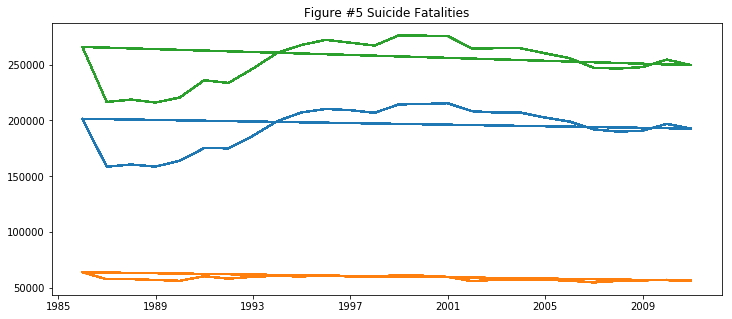

In [156]:
plt.figure(figsize=(12,5))
plt.subplot(111)
plt.title("Figure #5 Suicide Fatalities")
plt.plot(International['SuicideMale'])
plt.plot(International['SuicideFemale'])
plt.plot(International['SuicideAll'])
plt.show()

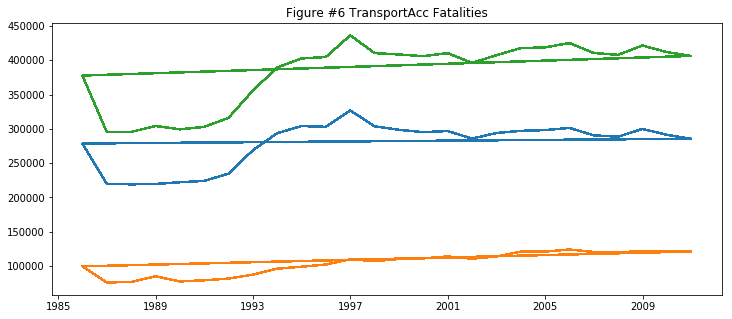

In [157]:
plt.figure(figsize=(12,5))
plt.subplot(111)
plt.title("Figure #6 TransportAcc Fatalities")
plt.plot(International['OtherMale'])
plt.plot(International['OtherFemale'])
plt.plot(International['OtherAll'])
plt.show()

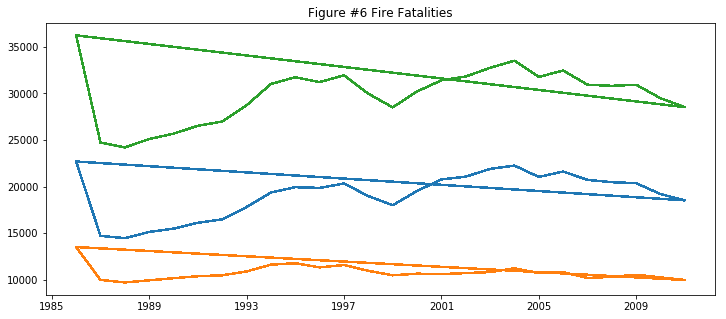

In [158]:
plt.figure(figsize=(12,5))
plt.subplot(111)
plt.title("Figure #6 Fire Fatalities")
plt.plot(International['FireMale'])
plt.plot(International['FireFemale'])
plt.plot(International['FireAll'])
plt.show()

# Fatality by Country

#### Creating a dataframe that Summarizes the data by Country 
#### population based on Calendar 2010 and the accidents are the sum 1985 to 2010

In [159]:
ByCountry = pd.DataFrame(columns=[])

ByCountry['PopMale'] = data['PopMale'].groupby([data['Country']]).max()
ByCountry['PopFemale'] = data['PopFemale'].groupby([data['Country']]).max()
ByCountry['TotalPop'] = data['TotalPop'].groupby([data['Country']]).max()

ByCountry['TransportAccAll'] = data['TransportAccAll'].groupby([data['Country']]).sum()
ByCountry ['TransportAccAll Percent']= ByCountry['TransportAccAll']/ByCountry['TotalPop']

ByCountry['FallsAll'] = data['FallsAll'].groupby([data['Country']]).sum()
ByCountry ['FallsAll Percent']= ByCountry['FallsAll']/ByCountry['TotalPop']

ByCountry['PoisonAll'] = data['PoisonAll'].groupby([data['Country']]).sum()
ByCountry ['PoisonAll Percent']= ByCountry['PoisonAll']/ByCountry['TotalPop']

ByCountry['SuicideAll'] = data['SuicideAll'].groupby([data['Country']]).sum()
ByCountry ['SuicideAll Percent']= ByCountry['SuicideAll']/ByCountry['TotalPop']

ByCountry['AssaultAll'] = data['AssaultAll'].groupby([data['Country']]).sum()
ByCountry ['AssaultAll Percent']= ByCountry['AssaultAll']/ByCountry['TotalPop']
ByCountry['AssaultMale'] = data['AssaultMale'].groupby([data['Country']]).sum()
ByCountry['AssaultMale Percent']= ByCountry['AssaultMale']/ByCountry['PopMale']
ByCountry['AssaultFemale'] = data['AssaultFemale'].groupby([data['Country']]).sum()
ByCountry['AssaultFemale Percent']= ByCountry['AssaultFemale']/ByCountry['PopFemale']


ByCountry['OtherAll'] = data['OtherAll'].groupby([data['Country']]).sum()



ByCountry['FallsMale'] = data['FallsMale'].groupby([data['Country']]).sum()
ByCountry['FallsMale Percent']= ByCountry['FallsMale']/ByCountry['PopMale']

ByCountry['TransportAccMale'] = data['TransportAccMale'].groupby([data['Country']]).sum()
ByCountry['TransportAccMale Percent']= ByCountry['TransportAccMale']/ByCountry['PopMale']

ByCountry['PoisonMale'] = data['PoisonMale'].groupby([data['Country']]).sum()
ByCountry['PoisonMale Percent']= ByCountry['PoisonMale']/ByCountry['PopMale']

ByCountry['SuicideMale'] = data['SuicideMale'].groupby([data['Country']]).sum()
ByCountry['SuicideMale Percent']= ByCountry['SuicideMale']/ByCountry['PopMale']


ByCountry['OtherMale'] = data['OtherMale'].groupby([data['Country']]).sum()

ByCountry['FallsFemale'] = data['FallsFemale'].groupby([data['Country']]).sum()
ByCountry['FallsFemale Percent']= ByCountry['FallsFemale']/ByCountry['PopFemale']

ByCountry['TransportAccFemale'] = data['TransportAccFemale'].groupby([data['Country']]).sum()
ByCountry['TransportAccFemale Percent']= ByCountry['TransportAccFemale']/ByCountry['PopFemale']

ByCountry['PoisonFemale'] = data['PoisonFemale'].groupby([data['Country']]).sum()
ByCountry['PoisonFemale Percent']= ByCountry['PoisonFemale']/ByCountry['PopFemale']

ByCountry['SuicideFemale'] = data['SuicideFemale'].groupby([data['Country']]).sum()
ByCountry['SuicideFemale Percent']= ByCountry['SuicideFemale']/ByCountry['PopFemale']


ByCountry['OtherFemale'] = data['OtherFemale'].groupby([data['Country']]).sum()


ByCountry['FireAll'] = data['FireAll'].groupby([data['Country']]).sum()
ByCountry ['FireAll Percent']= ByCountry['FireAll']/ByCountry['TotalPop']
ByCountry['FireMale'] = data['FireMale'].groupby([data['Country']]).sum()
ByCountry['FireMale Percent']= ByCountry['FireMale']/ByCountry['PopMale']
ByCountry['FireFemale'] = data['FireFemale'].groupby([data['Country']]).sum()
ByCountry['FireFemale Percent']= ByCountry['FireFemale']/ByCountry['PopFemale']


ByCountry['Accidental'] = data['Accidental'].groupby([data['Country']]).sum()
ByCountry['Accidental Percent']= ByCountry['Accidental']/ByCountry['TotalPop']

ByCountry['Intentional'] = data['Intentional'].groupby([data['Country']]).sum()
ByCountry['Intentional Percent']= ByCountry['Intentional']/ByCountry['TotalPop']


## Deaths Via transportation

                          TransportAccAll Percent  TransportAccAll
Country                                                           
UNITED STATES OF AMERICA                 0.003896        1207365.0
RUSSIAN FEDERATION                       0.006523         967369.0
BRAZIL                                   0.004251         844298.0
MEXICO                                   0.003291         390416.0
JAPAN                                    0.002572         327472.0


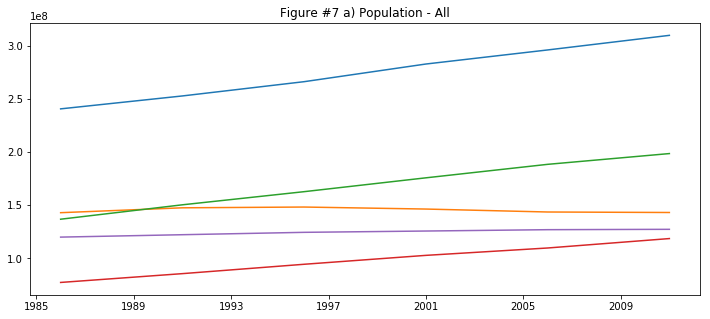

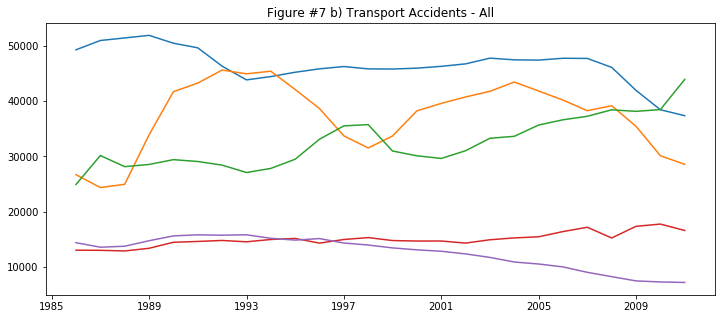

                          TransportAccFemale Percent  TransportAccFemale
Country                                                                 
UNITED STATES OF AMERICA                    0.002489            366401.0
RUSSIAN FEDERATION                          0.003524            245646.0
BRAZIL                                      0.001800            169780.0
JAPAN                                       0.001566             93718.0
MEXICO                                      0.001440             81133.0


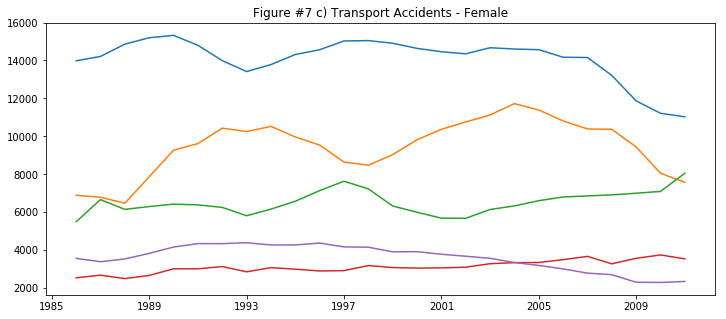

                          TransportAccMale Percent  TransportAccMale
Country                                                             
UNITED STATES OF AMERICA                  0.005169          840964.0
RUSSIAN FEDERATION                        0.009183          721723.0
BRAZIL                                    0.006469          674518.0
MEXICO                                    0.004966          309283.0
JAPAN                                     0.003464          233754.0


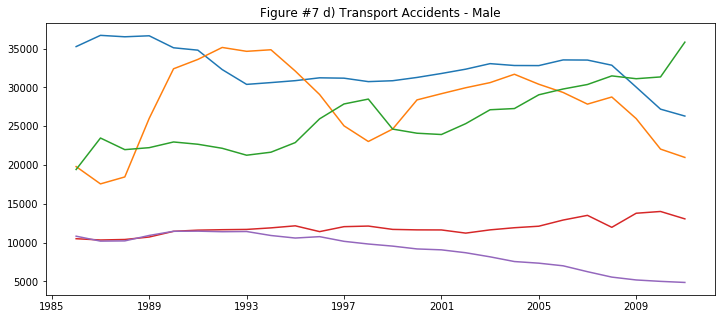

In [160]:
#by decending Overall TransportAcc deaths  from 1985 to 2010

ByCountry = ByCountry.sort_values(by=['TransportAccAll'], ascending=False)
a = ByCountry.head(5)
a['Country'] = a.index
print(a[['TransportAccAll Percent','TransportAccAll']])
a = a['Country']
b0 = data.loc[data['Country'].isin(a[0:1,])]
b1 = data.loc[data['Country'].isin(a[1:2,])]
b2 = data.loc[data['Country'].isin(a[2:3,])]
b3 = data.loc[data['Country'].isin(a[3:4,])]
b4 = data.loc[data['Country'].isin(a[4:5,])]



plt.figure(figsize=(12,5))
plt.title("Figure #7 a) Population - All")
plt.plot(b0['TotalPop'])
plt.plot(b1['TotalPop'])
plt.plot(b2['TotalPop'])
plt.plot(b3['TotalPop'])
plt.plot(b4['TotalPop'])
plt.show()


plt.figure(figsize=(12,5))
plt.title("Figure #7 b) Transport Accidents - All")
plt.plot(b0['TransportAccAll'])
plt.plot(b1['TransportAccAll'])
plt.plot(b2['TransportAccAll'])
plt.plot(b3['TransportAccAll'])
plt.plot(b4['TransportAccAll'])
plt.show()

#by decendingFemale TransportAcc deaths from 1985 to 2010

ByCountry = ByCountry.sort_values(by=['TransportAccFemale'], ascending=False)
a = ByCountry.head(5)
a['Country'] = a.index
print(a[['TransportAccFemale Percent','TransportAccFemale']])
a = a['Country']
b0 = data.loc[data['Country'].isin(a[0:1,])]
b1 = data.loc[data['Country'].isin(a[1:2,])]
b2 = data.loc[data['Country'].isin(a[2:3,])]
b3 = data.loc[data['Country'].isin(a[3:4,])]
b4 = data.loc[data['Country'].isin(a[4:5,])]
plt.figure(figsize=(12,5))
plt.title("Figure #7 c) Transport Accidents - Female")
plt.plot(b0['TransportAccFemale'])
plt.plot(b1['TransportAccFemale'])
plt.plot(b2['TransportAccFemale'])
plt.plot(b4['TransportAccFemale'])
plt.plot(b3['TransportAccFemale'])

plt.show()

#by decendingMale TransportAcc deaths from 1985 to 2010

ByCountry = ByCountry.sort_values(by=['TransportAccMale'], ascending=False)
a = ByCountry.head(5)
a['Country'] = a.index
print(a[['TransportAccMale Percent','TransportAccMale']])
a = a['Country']
b0 = data.loc[data['Country'].isin(a[0:1,])]
b1 = data.loc[data['Country'].isin(a[1:2,])]
b2 = data.loc[data['Country'].isin(a[2:3,])]
b3 = data.loc[data['Country'].isin(a[3:4,])]
b4 = data.loc[data['Country'].isin(a[4:5,])]
plt.figure(figsize=(12,5))
plt.title("Figure #7 d) Transport Accidents - Male")
plt.plot(b0['TransportAccMale'])
plt.plot(b1['TransportAccMale'])
plt.plot(b2['TransportAccMale'])
plt.plot(b3['TransportAccMale'])
plt.plot(b4['TransportAccMale'])
plt.show()


## Deaths By Murder


                          AssaultAll Percent  AssaultAll
Country                                                 
BRAZIL                              0.005086   1010132.0
RUSSIAN FEDERATION                  0.005359    794701.0
COLOMBIA                            0.012841    589636.0
UNITED STATES OF AMERICA            0.001697    525923.0
MEXICO                              0.003040    360588.0


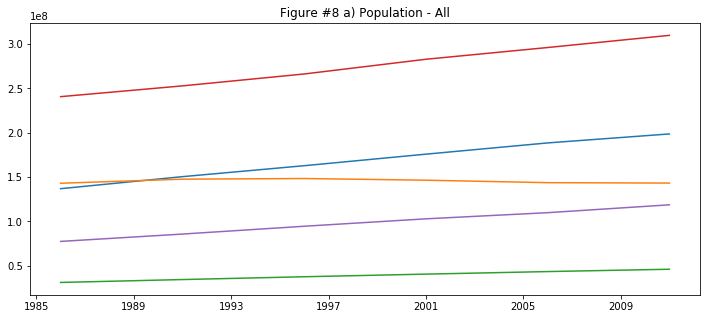

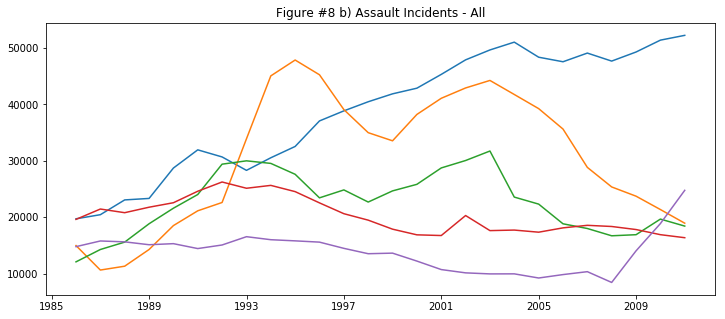

                          AssaultFemale Percent  AssaultFemale
Country                                                       
RUSSIAN FEDERATION                     0.002832       197402.0
UNITED STATES OF AMERICA               0.000803       118246.0
BRAZIL                                 0.000893        84287.0
COLOMBIA                               0.002081        44912.0
UKRAINE                                0.001553        37505.0


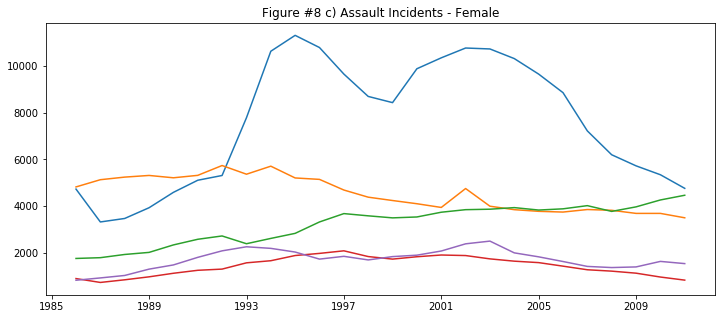

                          AssaultMale Percent  AssaultMale
Country                                                   
BRAZIL                               0.008879     925845.0
RUSSIAN FEDERATION                   0.007600     597299.0
COLOMBIA                             0.022383     544724.0
UNITED STATES OF AMERICA             0.002506     407677.0
MEXICO                               0.005190     323215.0


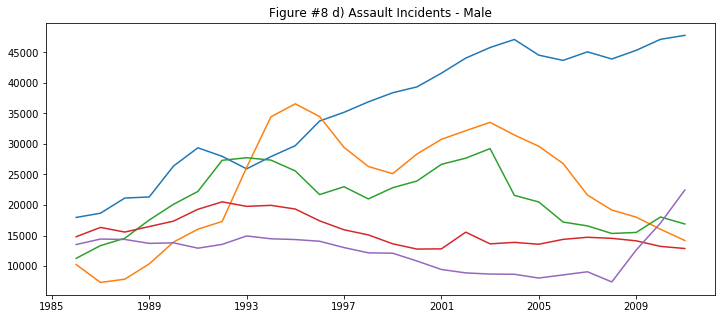

In [161]:
#by decending Overall Assault deaths  from 1985 to 2010

ByCountry = ByCountry.sort_values(by=['AssaultAll'], ascending=False)
a = ByCountry.head(5)
a['Country'] = a.index
print(a[['AssaultAll Percent','AssaultAll']])
a = a['Country']
b0 = data.loc[data['Country'].isin(a[0:1,])]
b1 = data.loc[data['Country'].isin(a[1:2,])]
b2 = data.loc[data['Country'].isin(a[2:3,])]
b3 = data.loc[data['Country'].isin(a[3:4,])]
b4 = data.loc[data['Country'].isin(a[4:5,])]


plt.figure(figsize=(12,5))
plt.title("Figure #8 a) Population - All")
plt.plot(b0['TotalPop'])
plt.plot(b1['TotalPop'])
plt.plot(b2['TotalPop'])
plt.plot(b3['TotalPop'])
plt.plot(b4['TotalPop'])
plt.show()





plt.figure(figsize=(12,5))
plt.title("Figure #8 b) Assault Incidents - All")
plt.plot(b0['AssaultAll'])
plt.plot(b1['AssaultAll'])
plt.plot(b2['AssaultAll'])
plt.plot(b3['AssaultAll'])
plt.plot(b4['AssaultAll'])
plt.show()

#by decendingFemale Assault deaths from 1985 to 2010

ByCountry = ByCountry.sort_values(by=['AssaultFemale'], ascending=False)
a = ByCountry.head(5)
a['Country'] = a.index
print(a[['AssaultFemale Percent','AssaultFemale']])
a = a['Country']
b0 = data.loc[data['Country'].isin(a[0:1,])]
b1 = data.loc[data['Country'].isin(a[1:2,])]
b2 = data.loc[data['Country'].isin(a[2:3,])]
b3 = data.loc[data['Country'].isin(a[3:4,])]
b4 = data.loc[data['Country'].isin(a[4:5,])]
plt.figure(figsize=(12,5))
plt.title("Figure #8 c) Assault Incidents - Female")
plt.plot(b0['AssaultFemale'])
plt.plot(b1['AssaultFemale'])
plt.plot(b2['AssaultFemale'])
plt.plot(b4['AssaultFemale'])
plt.plot(b3['AssaultFemale'])

plt.show()

#by decendingMale Assault deaths from 1985 to 2010

ByCountry = ByCountry.sort_values(by=['AssaultMale'], ascending=False)
a = ByCountry.head(5)
a['Country'] = a.index
print(a[['AssaultMale Percent','AssaultMale']])
a = a['Country']
b0 = data.loc[data['Country'].isin(a[0:1,])]
b1 = data.loc[data['Country'].isin(a[1:2,])]
b2 = data.loc[data['Country'].isin(a[2:3,])]
b3 = data.loc[data['Country'].isin(a[3:4,])]
b4 = data.loc[data['Country'].isin(a[4:5,])]
plt.figure(figsize=(12,5))
plt.title("Figure #8 d) Assault Incidents - Male")
plt.plot(b0['AssaultMale'])
plt.plot(b1['AssaultMale'])
plt.plot(b2['AssaultMale'])
plt.plot(b3['AssaultMale'])
plt.plot(b4['AssaultMale'])
plt.show()


## Deaths By Suicide


                          SuicideAll Percent  SuicideAll
Country                                                 
RUSSIAN FEDERATION                  0.008235   1221265.0
UNITED STATES OF AMERICA            0.002666    826137.0
JAPAN                               0.005365    683135.0
UKRAINE                             0.006000    308207.0
FRANCE                              0.004614    290495.0


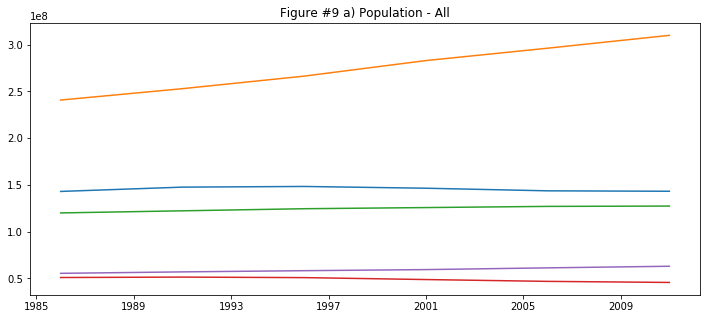

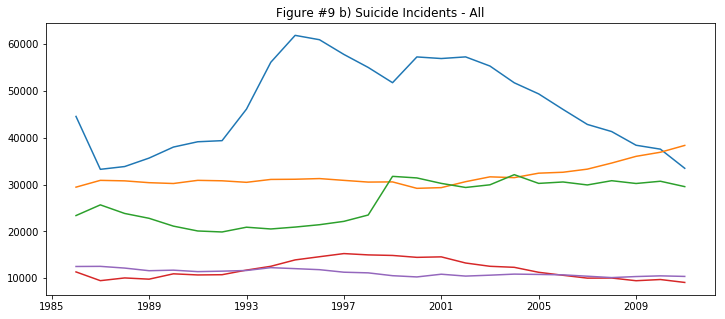

                          SuicideFemale Percent  SuicideFemale
Country                                                       
RUSSIAN FEDERATION                     0.003228       224959.0
JAPAN                                  0.003557       212875.0
UNITED STATES OF AMERICA               0.001138       167551.0
FRANCE                                 0.002668        79789.0
GERMANY                                0.001735        66770.0


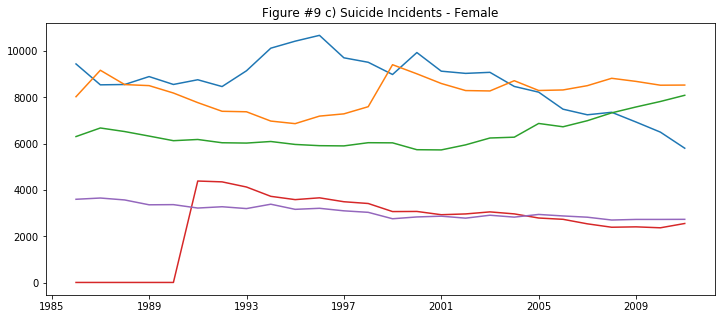

                          SuicideMale Percent  SuicideMale
Country                                                   
RUSSIAN FEDERATION                   0.012676     996306.0
UNITED STATES OF AMERICA             0.004048     658586.0
JAPAN                                0.006969     470260.0
UKRAINE                              0.009109     248016.0
FRANCE                               0.006374     210706.0


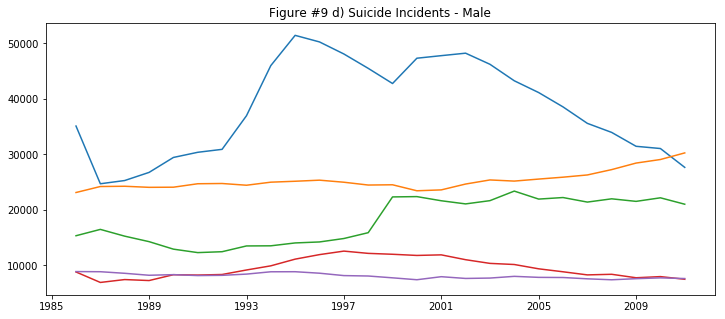

In [162]:
#by decending Overall Suicide deaths  from 1985 to 2010

ByCountry = ByCountry.sort_values(by=['SuicideAll'], ascending=False)
a = ByCountry.head(5)
a['Country'] = a.index
print(a[['SuicideAll Percent','SuicideAll']])
a = a['Country']
b0 = data.loc[data['Country'].isin(a[0:1,])]
b1 = data.loc[data['Country'].isin(a[1:2,])]
b2 = data.loc[data['Country'].isin(a[2:3,])]
b3 = data.loc[data['Country'].isin(a[3:4,])]
b4 = data.loc[data['Country'].isin(a[4:5,])]

plt.figure(figsize=(12,5))
plt.title("Figure #9 a) Population - All")
plt.plot(b0['TotalPop'])
plt.plot(b1['TotalPop'])
plt.plot(b2['TotalPop'])
plt.plot(b3['TotalPop'])
plt.plot(b4['TotalPop'])
plt.show()




plt.figure(figsize=(12,5))
plt.title("Figure #9 b) Suicide Incidents - All")
plt.plot(b0['SuicideAll'])
plt.plot(b1['SuicideAll'])
plt.plot(b2['SuicideAll'])
plt.plot(b3['SuicideAll'])
plt.plot(b4['SuicideAll'])
plt.show()

#by decendingFemale Suicide deaths from 1985 to 2010

ByCountry = ByCountry.sort_values(by=['SuicideFemale'], ascending=False)
a = ByCountry.head(5)
a['Country'] = a.index
print(a[['SuicideFemale Percent','SuicideFemale']])
a = a['Country']
b0 = data.loc[data['Country'].isin(a[0:1,])]
b1 = data.loc[data['Country'].isin(a[1:2,])]
b2 = data.loc[data['Country'].isin(a[2:3,])]
b3 = data.loc[data['Country'].isin(a[3:4,])]
b4 = data.loc[data['Country'].isin(a[4:5,])]
plt.figure(figsize=(12,5))
plt.title("Figure #9 c) Suicide Incidents - Female")
plt.plot(b0['SuicideFemale'])
plt.plot(b1['SuicideFemale'])
plt.plot(b2['SuicideFemale'])
plt.plot(b4['SuicideFemale'])
plt.plot(b3['SuicideFemale'])

plt.show()

#by decendingMale Suicide deaths from 1985 to 2010

ByCountry = ByCountry.sort_values(by=['SuicideMale'], ascending=False)
a = ByCountry.head(5)
a['Country'] = a.index
print(a[['SuicideMale Percent','SuicideMale']])
a = a['Country']
b0 = data.loc[data['Country'].isin(a[0:1,])]
b1 = data.loc[data['Country'].isin(a[1:2,])]
b2 = data.loc[data['Country'].isin(a[2:3,])]
b3 = data.loc[data['Country'].isin(a[3:4,])]
b4 = data.loc[data['Country'].isin(a[4:5,])]
plt.figure(figsize=(12,5))
plt.title("Figure #9 d) Suicide Incidents - Male")
plt.plot(b0['SuicideMale'])
plt.plot(b1['SuicideMale'])
plt.plot(b2['SuicideMale'])
plt.plot(b3['SuicideMale'])
plt.plot(b4['SuicideMale'])
plt.show()


## Deaths By Poison


                          PoisonAll Percent  PoisonAll
Country                                               
RUSSIAN FEDERATION                 0.008149  1208436.0
UNITED STATES OF AMERICA           0.001226   380007.0
UKRAINE                            0.005993   307841.0
KAZAKHSTAN                         0.004953    81872.0
BELARUS                            0.006566    67182.0


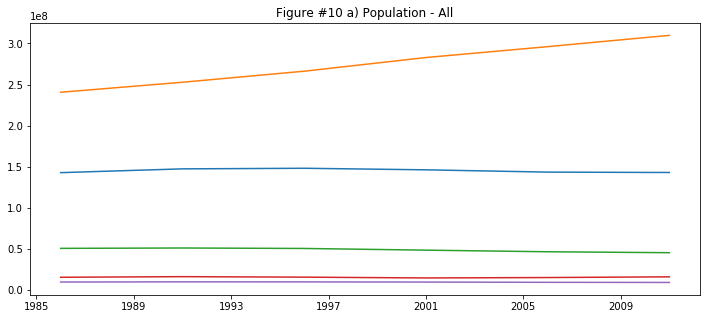

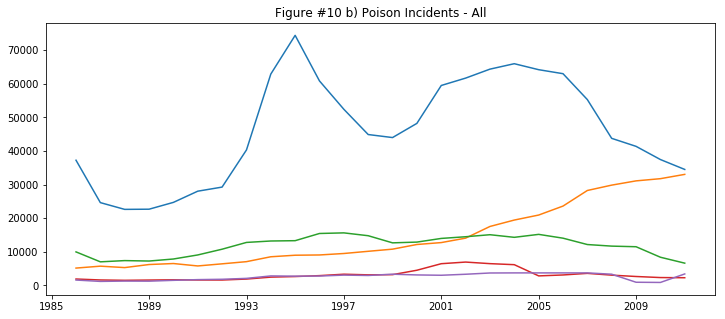

                          PoisonFemale Percent  PoisonFemale
Country                                                     
RUSSIAN FEDERATION                    0.003976      277097.0
UNITED STATES OF AMERICA              0.000804      118321.0
UKRAINE                               0.002763       66716.0
KAZAKHSTAN                            0.002374       20799.0
BELARUS                               0.003052       14678.0


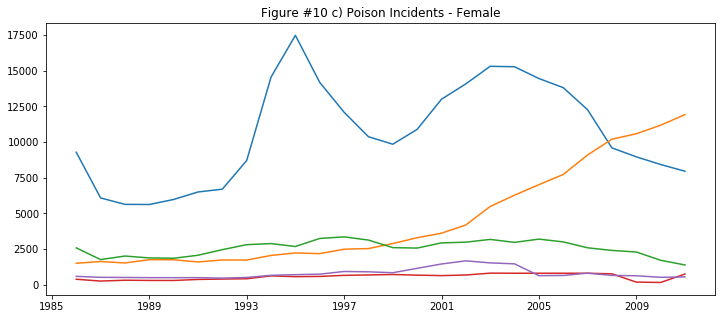

                          PoisonMale Percent  PoisonMale
Country                                                 
RUSSIAN FEDERATION                  0.011850    931339.0
UNITED STATES OF AMERICA            0.001609    261686.0
UKRAINE                             0.008856    241125.0
KAZAKHSTAN                          0.007861     61073.0
BELARUS                             0.009682     52504.0


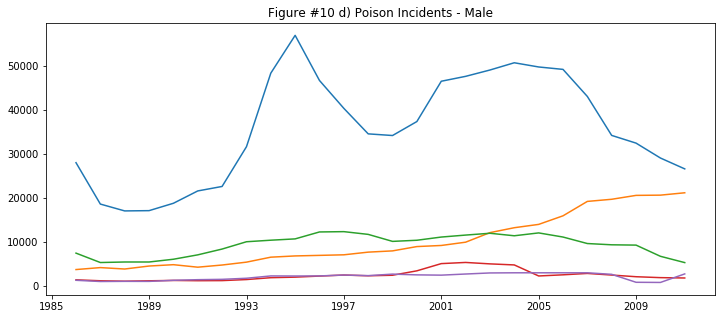

In [163]:
#by decending Overall Poison deaths  from 1985 to 2010

ByCountry = ByCountry.sort_values(by=['PoisonAll'], ascending=False)
a = ByCountry.head(5)
a['Country'] = a.index
print(a[['PoisonAll Percent','PoisonAll']])
a = a['Country']
b0 = data.loc[data['Country'].isin(a[0:1,])]
b1 = data.loc[data['Country'].isin(a[1:2,])]
b2 = data.loc[data['Country'].isin(a[2:3,])]
b3 = data.loc[data['Country'].isin(a[3:4,])]
b4 = data.loc[data['Country'].isin(a[4:5,])]

plt.figure(figsize=(12,5))
plt.title("Figure #10 a) Population - All")
plt.plot(b0['TotalPop'])
plt.plot(b1['TotalPop'])
plt.plot(b2['TotalPop'])
plt.plot(b3['TotalPop'])
plt.plot(b4['TotalPop'])
plt.show()




plt.figure(figsize=(12,5))
plt.title("Figure #10 b) Poison Incidents - All")
plt.plot(b0['PoisonAll'])
plt.plot(b1['PoisonAll'])
plt.plot(b2['PoisonAll'])
plt.plot(b3['PoisonAll'])
plt.plot(b4['PoisonAll'])
plt.show()

#by decendingFemale Poison deaths from 1985 to 2010

ByCountry = ByCountry.sort_values(by=['PoisonFemale'], ascending=False)
a = ByCountry.head(5)
a['Country'] = a.index
print(a[['PoisonFemale Percent','PoisonFemale']])
a = a['Country']
b0 = data.loc[data['Country'].isin(a[0:1,])]
b1 = data.loc[data['Country'].isin(a[1:2,])]
b2 = data.loc[data['Country'].isin(a[2:3,])]
b3 = data.loc[data['Country'].isin(a[3:4,])]
b4 = data.loc[data['Country'].isin(a[4:5,])]
plt.figure(figsize=(12,5))
plt.title("Figure #10 c) Poison Incidents - Female")
plt.plot(b0['PoisonFemale'])
plt.plot(b1['PoisonFemale'])
plt.plot(b2['PoisonFemale'])
plt.plot(b4['PoisonFemale'])
plt.plot(b3['PoisonFemale'])

plt.show()

#by decendingMale Poison deaths from 1985 to 2010

ByCountry = ByCountry.sort_values(by=['PoisonMale'], ascending=False)
a = ByCountry.head(5)
a['Country'] = a.index
print(a[['PoisonMale Percent','PoisonMale']])
a = a['Country']
b0 = data.loc[data['Country'].isin(a[0:1,])]
b1 = data.loc[data['Country'].isin(a[1:2,])]
b2 = data.loc[data['Country'].isin(a[2:3,])]
b3 = data.loc[data['Country'].isin(a[3:4,])]
b4 = data.loc[data['Country'].isin(a[4:5,])]
plt.figure(figsize=(12,5))
plt.title("Figure #10 d) Poison Incidents - Male")
plt.plot(b0['PoisonMale'])
plt.plot(b1['PoisonMale'])
plt.plot(b2['PoisonMale'])
plt.plot(b3['PoisonMale'])
plt.plot(b4['PoisonMale'])
plt.show()


# Death by Fire

                          FireAll Percent   FireAll
Country                                            
RUSSIAN FEDERATION               0.001479  219309.0
UNITED STATES OF AMERICA         0.000311   96393.0
UKRAINE                          0.000857   44013.0
JAPAN                            0.000276   35136.0
BRAZIL                           0.000146   28942.0


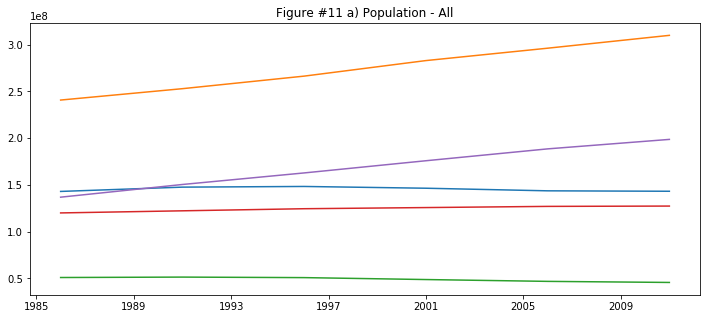

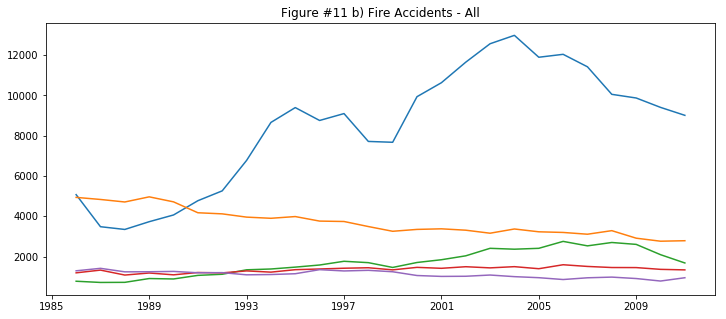

                          FireFemale Percent  FireFemale
Country                                                 
RUSSIAN FEDERATION                  0.000946     65967.0
UNITED STATES OF AMERICA            0.000260     38336.0
UKRAINE                             0.000560     13518.0
JAPAN                               0.000223     13361.0
BRAZIL                              0.000119     11186.0


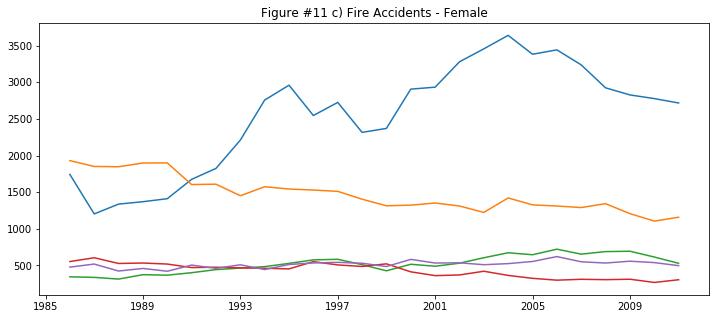

                          FireMale Percent  FireMale
Country                                             
RUSSIAN FEDERATION                0.001951  153342.0
UNITED STATES OF AMERICA          0.000357   58057.0
UKRAINE                           0.001120   30495.0
JAPAN                             0.000323   21775.0
BRAZIL                            0.000170   17756.0


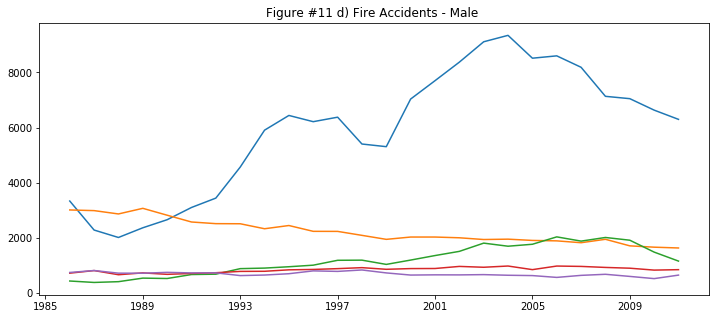

In [164]:
#by decending Overall Fire deaths  from 1985 to 2010

ByCountry = ByCountry.sort_values(by=['FireAll'], ascending=False)
a = ByCountry.head(5)
a['Country'] = a.index
print(a[['FireAll Percent','FireAll']])
a = a['Country']
b0 = data.loc[data['Country'].isin(a[0:1,])]
b1 = data.loc[data['Country'].isin(a[1:2,])]
b2 = data.loc[data['Country'].isin(a[2:3,])]
b3 = data.loc[data['Country'].isin(a[3:4,])]
b4 = data.loc[data['Country'].isin(a[4:5,])]

plt.figure(figsize=(12,5))
plt.title("Figure #11 a) Population - All")
plt.plot(b0['TotalPop'])
plt.plot(b1['TotalPop'])
plt.plot(b2['TotalPop'])
plt.plot(b3['TotalPop'])
plt.plot(b4['TotalPop'])
plt.show()


plt.figure(figsize=(12,5))
plt.title("Figure #11 b) Fire Accidents - All")
plt.plot(b0['FireAll'])
plt.plot(b1['FireAll'])
plt.plot(b2['FireAll'])
plt.plot(b3['FireAll'])
plt.plot(b4['FireAll'])
plt.show()

#by decendingFemale Fire deaths from 1985 to 2010

ByCountry = ByCountry.sort_values(by=['FireFemale'], ascending=False)
a = ByCountry.head(5)
a['Country'] = a.index
print(a[['FireFemale Percent','FireFemale']])
a = a['Country']
b0 = data.loc[data['Country'].isin(a[0:1,])]
b1 = data.loc[data['Country'].isin(a[1:2,])]
b2 = data.loc[data['Country'].isin(a[2:3,])]
b3 = data.loc[data['Country'].isin(a[3:4,])]
b4 = data.loc[data['Country'].isin(a[4:5,])]
plt.figure(figsize=(12,5))
plt.title("Figure #11 c) Fire Accidents - Female")
plt.plot(b0['FireFemale'])
plt.plot(b1['FireFemale'])
plt.plot(b2['FireFemale'])
plt.plot(b4['FireFemale'])
plt.plot(b3['FireFemale'])

plt.show()

#by decendingMale Fire deaths from 1985 to 2010

ByCountry = ByCountry.sort_values(by=['FireMale'], ascending=False)
a = ByCountry.head(5)
a['Country'] = a.index
print(a[['FireMale Percent','FireMale']])
a = a['Country']
b0 = data.loc[data['Country'].isin(a[0:1,])]
b1 = data.loc[data['Country'].isin(a[1:2,])]
b2 = data.loc[data['Country'].isin(a[2:3,])]
b3 = data.loc[data['Country'].isin(a[3:4,])]
b4 = data.loc[data['Country'].isin(a[4:5,])]
plt.figure(figsize=(12,5))
plt.title("Figure #11 d) Fire Accidents - Male ")
plt.plot(b0['FireMale'])
plt.plot(b1['FireMale'])
plt.plot(b2['FireMale'])
plt.plot(b3['FireMale'])
plt.plot(b4['FireMale'])
plt.show()


                          Intentional Percent  Intentional
Country                                                   
RUSSIAN FEDERATION                   0.013594    2015966.0
UNITED STATES OF AMERICA             0.004363    1352060.0
BRAZIL                               0.005967    1185126.0
JAPAN                                0.005514     702041.0
COLOMBIA                             0.013774     632478.0


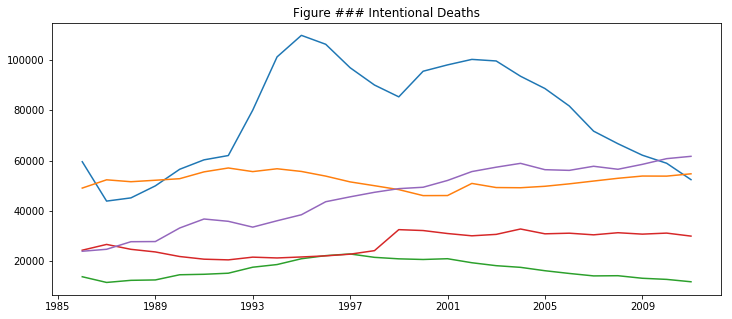

In [165]:
ByCountry = ByCountry.sort_values(by=['Intentional'], ascending=False)
a = ByCountry.head(5)
a['Country'] = a.index
print(a[['Intentional Percent','Intentional']])
plt.figure(figsize=(12,5))
plt.title("Figure ### Intentional Deaths")
plt.plot(b0['Intentional'])
plt.plot(b1['Intentional'])
plt.plot(b2['Intentional'])
plt.plot(b3['Intentional'])
plt.plot(b4['Intentional'])
plt.show()


                          Accidental Percent  Accidental
Country                                                 
RUSSIAN FEDERATION                  0.011324   1679298.0
UNITED STATES OF AMERICA            0.002880    892470.0
UKRAINE                             0.008229    422731.0
FRANCE                              0.004042    254516.0
ITALY                               0.003647    217296.0


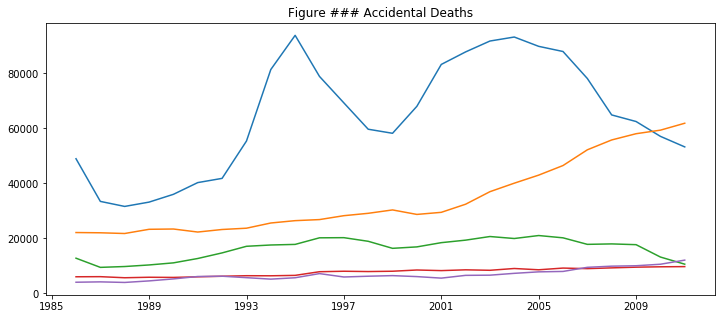

In [166]:
ByCountry = ByCountry.sort_values(by=['Accidental'], ascending=False)
a = ByCountry.head(5)
a['Country'] = a.index
print(a[['Accidental Percent','Accidental']])
plt.figure(figsize=(12,5))
plt.title("Figure ### Accidental Deaths")
plt.plot(b0['Accidental'])
plt.plot(b1['Accidental'])
plt.plot(b2['Accidental'])
plt.plot(b3['Accidental'])
plt.plot(b4['Accidental'])
plt.show()


In [167]:
Canada = pd.DataFrame(columns=[])
Canada = data.loc[data['Country']=='CANADA']
Canada.head(5)

,Country,TotalPop,PopMale,PopFemale,TransportAccAll,TransportAccMale,TransportAccFemale,FallsAll,FallsMale,FallsFemale,...,OtherFemale,Accidental,Intentional,DeathAll,AccidentalMale,IntentionalMale,DeathMale,AccidentalFemale,IntentionalFemale,DeathFemale
Year,,,,,,,,,,,,,,,,,,,,,
1985-12-31,CANADA,25848000.0,13699440.0,12148560.0,4573.0,3287.0,1286.0,1829.0,902.0,927.0,...,563.0,2650.0,3796.0,6446.0,1458.0,2906.0,4364.0,1192.0,890.0,2082.0
1986-12-31,CANADA,26210800.0,13891724.0,12319076.0,4440.0,3225.0,1215.0,2012.0,945.0,1067.0,...,550.0,2867.0,4183.0,7050.0,1491.0,3188.0,4679.0,1376.0,995.0,2371.0
1987-12-31,CANADA,26573600.0,14084008.0,12489592.0,4669.0,3391.0,1278.0,1907.0,868.0,1039.0,...,646.0,2764.0,4159.0,6923.0,1447.0,3163.0,4610.0,1317.0,996.0,2313.0
1988-12-31,CANADA,26936400.0,14276292.0,12660108.0,4445.0,3274.0,1171.0,2100.0,990.0,1110.0,...,553.0,2933.0,3997.0,6930.0,1563.0,3055.0,4618.0,1370.0,942.0,2312.0
1989-12-31,CANADA,27299200.0,14468576.0,12830624.0,4693.0,3337.0,1356.0,1994.0,954.0,1040.0,...,526.0,2936.0,4044.0,6980.0,1604.0,3046.0,4650.0,1332.0,998.0,2330.0


# Canadian Analysis

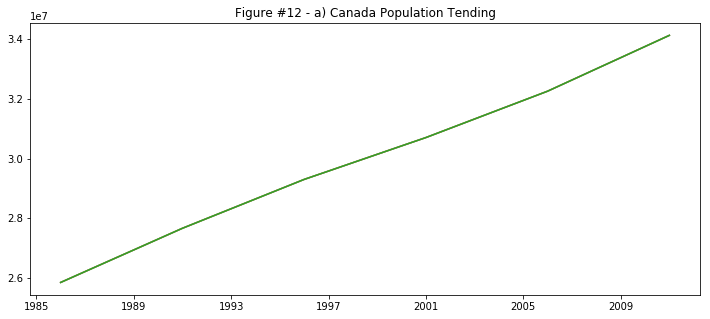

In [168]:
plt.figure(figsize=(12,5))
plt.title("Figure #12 - a) Canada Population Tending")
plt.plot(Canada['TotalPop'])
plt.plot(Canada['TotalPop'])
plt.plot(Canada['TotalPop'])
plt.show()


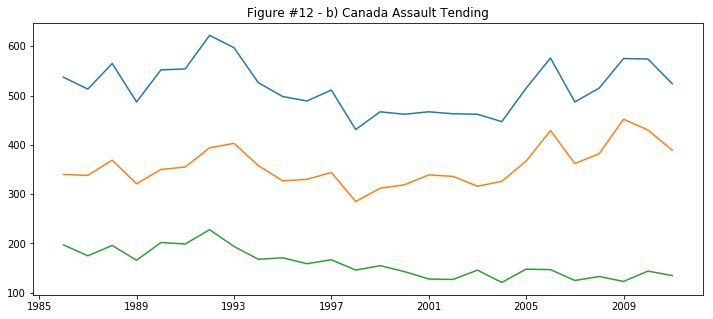

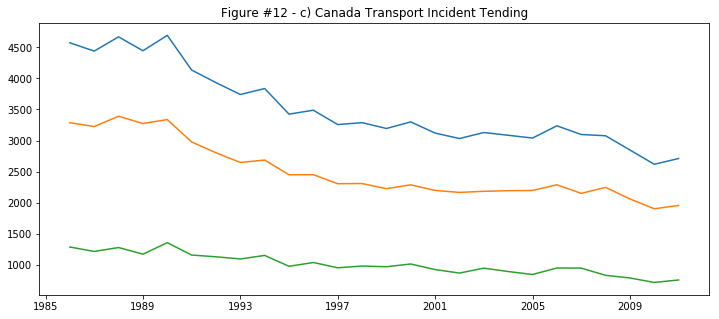

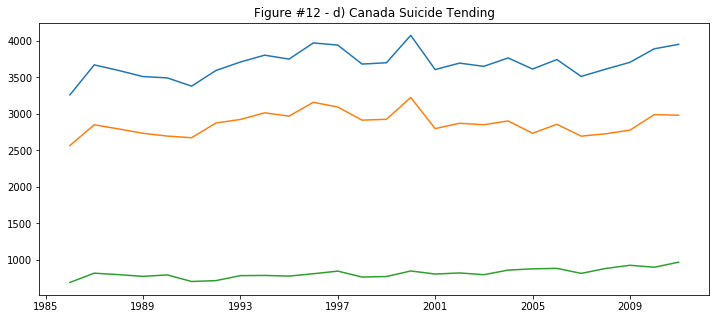

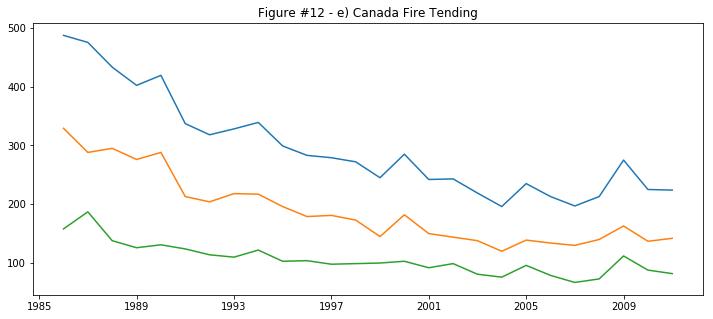

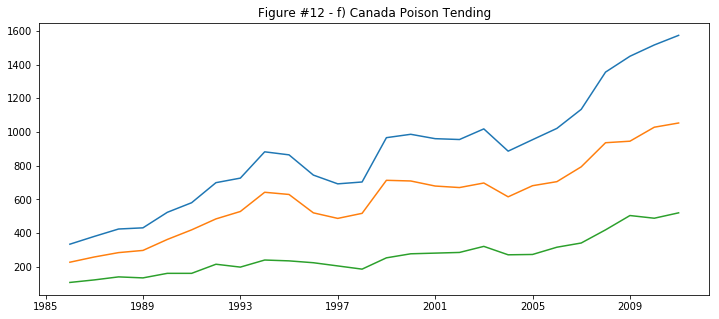

In [169]:

plt.figure(figsize=(12,5))
plt.title("Figure #12 - b) Canada Assault Tending")
plt.plot(Canada['AssaultAll'])
plt.plot(Canada['AssaultMale'])
plt.plot(Canada['AssaultFemale'])
plt.show()
plt.figure(figsize=(12,5))
plt.title("Figure #12 - c) Canada Transport Incident Tending")
plt.plot(Canada['TransportAccAll'])
plt.plot(Canada['TransportAccMale'])
plt.plot(Canada['TransportAccFemale'])
plt.show()
plt.figure(figsize=(12,5))
plt.title("Figure #12 - d) Canada Suicide Tending")
plt.plot(Canada['SuicideAll'])
plt.plot(Canada['SuicideMale'])
plt.plot(Canada['SuicideFemale'])
plt.show()
plt.figure(figsize=(12,5))
plt.title("Figure #12 - e) Canada Fire Tending")
plt.plot(Canada['FireAll'])
plt.plot(Canada['FireMale'])
plt.plot(Canada['FireFemale'])
plt.show()
plt.figure(figsize=(12,5))
plt.title("Figure #12 - f) Canada Poison Tending")
plt.plot(Canada['PoisonAll'])
plt.plot(Canada['PoisonMale'])
plt.plot(Canada['PoisonFemale'])
plt.show()
